<div>
    <table>
        <tr>
            <td>
                <center>
                    <h1>Brightway Introduction</h1>
                     <a href="https://www.psi.ch/en/ta/people/romain-sacchi">Romain Sacchi</a> (PSI)
                    <br><br>
                    Duration: 1 hour 15 minutes.
                </center>
            </td>
        </tr>
    </div>

# Brightway modules: bw2io, bw2data, bw2calc

*The following content is adapted from [the course materials dispensed at the 2022 Brightcon conference](https://github.com/Depart-de-Sentier/teaching-material/tree/main/beginners/Projects%2C%20databases%2C%20exchanges%2C%20activities). If you need additional notebooks, go to this repository*.


<div class="alert alert-info">
Note: we will be using <a href="https://docs.brightway.dev/en/legacy/">Brightway 2</a>, not <a href="https://docs.brightway.dev/en/latest/content/installation/index.html">Brightway 2.5</a>. From the user end side, very little differs between the two. The code executed throughout this notebook works with both versions.
</div>

**Brightway2 documentation** 👉 [https://docs.brightway.dev/en/legacy/index.html](https://docs.brightway.dev/en/legacy/index.html)

**Brightway25 documentation** 👉 [https://docs.brightway.dev/en/latest/index.html](https://docs.brightway.dev/en/latest/index.html)

### Learning objectives  
  - Learn about the general structure of Brightway and its most important abstractions: projects, databases, activities, and exchanges  
  - Learn how to find objects (notably activities and exchanges), assign them to variables, and work with them using their associated methods  
  - Learn about how simple LCA calculations are done (one product, one impact category), and specifically how the different matrices are built and used  
  - Learn how to extract information from the matrices (inputs or results) and translate them into nice, human-readable objects  
  - Learn different ways to carry out comparative LCAs  
  - Learn different ways to carry out LCAs with multiple impact categories

### Content  

#### 1) Getting started  
##### 1.1) Brightway
  - Accessing Brightway libraries  
  
##### 1.2) Projects  
  - Concept  
  - Creating a new project or switching to an existing project  
  - Contents of a project  
  
##### 1.3) bw2_setup(), biosphere3 database and LCIA methods  
  - bw2_setup()  
  - biosphere3 database and a first look at database objects  
  - Getting activities from codes or keys  
  - Methods  
  - Looking up elementary flows (list comprehensions, search)  
  - Searching for methods  
  - Nice display of data in methods 

##### 1.4) LCI databases  
  - Importing (succinct)  
  - LCI activities  
  - Looking up activities  
  - LCI exchanges
  - Loaded LCI databases
  
#### 2) My first LCA - simplest case:  
##### 2.1) General syntax of LCA calculations  

##### 2.2) The `demand` attribute  

##### 2.3) Reminder of the system that needs to be solved in calculating an LCI  

##### 2.4) Building the matrices  

  - $A$ matrix  
  - $B$ matrix  
  - $f$ (demand array)  
  
##### 2.5) Solution to the inventory calculation  

  - Supply array  
  - Inventory matrix  
  
##### 2.6) Life Cycle Impact Assessment  

  - `.lcia()` method  
  - Simple contribution analysis  
  
#### 3) My second LCA - comparative LCA:
    
#### 4) My third LCA - Multiple impact categories
  
#### 5) My first and third LCAs revisited with MultiLCA

### 1) Getting started

#### 1.1) Jupyter lab / notebooks and accessing Brightway2

This teaching material was produced with the intention to be used in Jupyter Notebooks.

<div class="alert alert-info">
This notebook is meant to run with a specific conda (and Python) environment.
    Make sure you have started Jupyter Notebooks or Jupyter Lab from the conda
    environment where the brightway modules are installed (the conda environment is called `bw2`).
</div>

##### Accessing Brightway libraries

The different modules in Brightway are Python libraries. This means that to use them, you can use any environment from which you usually use Python (Idle, command prompt, Spyder, or, as is the case today, Jupyter Notebooks).  

We will favor Jupyter Notebooks in this course because they allow us to integrate code and text and provide code snippets for you to complete.  

Like all other Python packages, you need to `import` Brightway modules.

Brightway (or ``brightway25``) is made up of *five* main modules:
* ``bw2io``: to handle data input and output.
* ``bw2data``: to handle databases and LCIA methods.
* ``bw2calc``: to perform single-, multi- and Monte Carlo analyses.
* ``bw2analyzer``: to analyze results produced by **bw2calc**.
* ``bw2parameters``: to use parameters in inventories.

And many other modules for more specific uses. For example:
* ``bw_processing``: to provide matrices to ``bw2calc`` directly, instead of a database.

We will for now import ``bw2io``, ``bw2data`` and ``bw2calc``.

In [1]:
import bw2io, bw2data, bw2calc

We can check the versions of these libraries, and where their code is located on your computer/the server.

In [2]:
bw2io.__version__

(0, 8, 12)

In [3]:
bw2io.__file__

'/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/bw2io/__init__.py'

We're also going to be using the following libraries:

In [2]:
import os               # to use "operating system dependent functionality"
import numpy as np      # "the fundamental package for scientific computing with Python"
import pandas as pd     # "high-performance, easy-to-use data structures and data analysis tools" for Python

#### 1.2) Projects

##### Concept

The top-level "container" in Brightway is the project (see [here](https://docs.brightway.dev/en/latest/content/theory/structure.html)). 

A project contains LCI databases, LCIA methods and other less often-used objects. Objects from one project do not interact with objects within other projects. By analogy, projects are like databases in other LCA software.  

![title](bw_structure.png)


When you first launch Brightway, you will be in the `default` project. You can check this using the `current` property of the `projects` object: 

In [5]:
bw2data.projects.current

'default'

##### Creating a new project, or switching to an existing project

Let's create a new project for this course. Let's call it ``bw2_intro``.

There are two ways of doing this:  
* `projects.create_project('bw2_intro')` will create the project, but you will remain in your current project.
* `projects.set_current('bw2_intro')` will switch you to the project passed as an argument and create it first if it doesn't exist.  Let's do the latter:

In [3]:
# The name of the project is entered as string; 
# it doesn't really have any restrictions, so can include spaces, 
# special characters, other languages, or even emoji.

bw2data.projects.set_current("training-day-2")

In [4]:
bw2data.projects.current

'training-day-2'

You can always see what projects you have on your computer by running `list(bw.projects)`. Unless you have worked with Brightway2 before on your computer, your list should contain two projects: 'default' and 'bw2_seminar_2017'.

_**Exercise**_: list the projects on your computer.

In [8]:
bw2data.projects

Brightway2 projects manager with 14 objects:
	
	66
	74
	aligned_bw25
	bw25_ei310
	default
	defult
	ecoinvent-3.10-cutoff
	ecoinvent-3.9.1-cutoff_bw25
	ecoinvent-3.9.11-cutoff
	ecoinvent-migration
	test
	training-day
	winter-school
Use `projects.report()` to get a report on all projects.

_**Exercise**_: check the currently activated project.

In [ ]:
bw2data.projects.current

Like in all Python modules, you can get additional information on the `projects` object and associated properties and methods by typing `help(projects)`. The [docs](https://docs.brightway.dev/en/latest/content/gettingstarted/projects.html) give you additional examples of the methods available from the project object.

##### Contents of a project

One property of `projects` is its location, given by `projects.dir`:

In [8]:
bw2data.projects.dir

'/Users/romain/Library/Application Support/Brightway3/training-day-2.cf3037efa523ef612ceb85312be46ddb'

<div class="alert alert-info">
    If working on your personal computer, try to locate your project directory on your computer.
</div>

First things first: **do not panic**! You can use ``brightway25`` for years without ever opening this directory, but we will discuss some of these files later.

It is simply interesting to note that, for now, all the directories are empty except the `lci` directory, which contains an empty database.

All in all, our (empty) project takes less than 100KB.  
It is now time to start populating the project.

#### 1.3) bw2setup(), biosphere3 database and LCIA methods

Our project is empty, as it contains zero databases:

In [10]:
bw2data.databases

Databases dictionary with 2 object(s):
	biosphere
	ecoinvent-3.10-cutoff

##### The use of `bw2io.import_ecoinvent_release()` **when working on your computer**

`bw2io.import_ecoinvent_release()` is a convenient function to install three databases at once: 1) a **biosphere** database (elementary flows), 2) the **LCIA methods** database and 3) the **ecoinvent** database.

In [ ]:
# we already have ecoinvent imported.
# hence, no need to run that on for now.

# bw2io.import_ecoinvent_release(
#     version="3.10", 
#     system_model="cutoff", # other options are "consequential", "apos" and "EN15804"
#     username="xxxx",
#     password="xxxx",
#     biosphere_name="biosphere" # optional, otherwise a name is chosen for you
# )

The output tells us that import_ecoinvent_release() created some very useful things:  
  - Created a database called "biosphere": this database contains elementary flows (called biosphere exchanges in Brightway2)  
  - **762** impact assessment methods
  - the ecoinvent 3.10 cut-off database

<div class="alert alert-info">
    Note: The biosphere database contains all "natural" flows human-made activities connect to. E.g., CO$_{2}$ emissions, ore in ground, etc.
</div>
  
It also created some `mapping` between the imported exchanges and some integers: more on this later.  
The whole directory now takes up 1'640MB.

<div class="alert alert-info">
    Note: We have just created the biosphere database from a local file. <a href="https://files.brightway.dev">files.brightway.dev</a> also offers a few different online versions of the biosphere database. You can list them doing: bw2io.remote.PROJECTS_BW25
</div>

##### The *biosphere3* database and a first look at database objects

<div class="alert alert-info">
    Note: You can always list the databases inside a project by simply typing 'bw2data.databases'. This accesses the 'database.json' file in your 'project.dir' (I learned the latter by typing `bw2data.databases?`, you should try it too.).
</div>

In [ ]:
bw2data.databases

While not impossible to interact with the data at this level, you probably never will unless you are developping some funky program. Instead, it is strongly recommended to learn to work with `abstractions`.  

To access a database in Brightway, you use the `Database` initialization method (again, you can type `bw2data.Database?` for more information - this is the last time I'll mention this. The [docs](https://docs.brightway.dev/en/latest/content/gettingstarted/databases.html) also have an excellent page about the methods available from the Database object.

In [11]:
bw2data.Database('biosphere')

Brightway2 SQLiteBackend: biosphere

It doesn't actually return anything other than information about the Backend.  
However, there are many properties and functions associated with this database object.  These are found [here](https://2.docs.brightway.dev/technical/bw2data.html#databasechooser). We can also have a look through the autocomplete. Let's assign the database to a variable:

In [5]:
my_bio = bw2data.Database('biosphere')

In [13]:
my_bio

Brightway2 SQLiteBackend: biosphere

Let's check the my_bio `type`:

In [14]:
type(my_bio)

bw2data.backends.peewee.database.SQLiteBackend

Let's check its length:

In [15]:
len(my_bio)

4362

This is exactly the number of items we saw had been added to databases.db  
Given this, what do you think is going on?

If you type `my_bio.` and click on tab, you should get a list of properties and methods associated with database objects. Try this now:

In [16]:
my_bio.random()        # Type my_bio. and click tab. Have a look at the different properties and objects

'Monoethanolamine' (kilogram, None, ('air',))

Some of the more basic ones we will be using now are :  
  - `random()` - returns a random activity in the database
  - `get(*valid_exchange_tuple*)` - returns an activity, but you must know the activity key
  - `load()` - loads the whole database as a dictionary.
  - `make_searchable` - allows searching of the database (by default, it is already searchable)
  - `search` - search the database  
  
Lets start with `random`:

This returns a biosphere activity, but without assigning it to a variable, there is not much we can do with it directly.  

Note: It may seem counter-intuitive for elementary *flows* to be considered *activities* in Brightway, but it is no mistake. 
LCA models are made up of **nodes** (activities) that are linked by **edges** (exchanges). The biosphere activities are the nodes *outside* the technosphere. Emissions and resource extractions are modelled as exchanges between activities in the technosphere (part of the product system) and these biosphere activities.  

More on this later. 

For now, let's assign another random activity to a variable:

In [6]:
random_biosphere = my_bio.random()
random_biosphere

'Hydrogen sulfide' (kilogram, None, ('water',))

We can get the type of the object that was returned from the database:

In [19]:
type(random_biosphere)

bw2data.backends.peewee.proxies.Activity

The type is an **activity proxy**. Activity proxies allow us to interact with the content of the database.

In Brightway, we *almost* always work with `Activity` or `Exchange` objects. 

To see what the activity contains, we can convert it to a dictionary:

In [21]:
type(random_biosphere.as_dict())

dict

##### Getting activities from codes or keys

We can see that the activities in the biosphere3 database have unique **codes**, which we can use with the `get` function:

Activities can also be "gotten" via `get_activity`, but the argument is the activity **key**, consisting of a tuple with two elements: the database name, and the activity code.

**Exercise:** Use `bw.get_activity()` to retrieve the random biosphere activity. 

In [22]:
database_name = random_biosphere['database']
code = random_biosphere['code']
random_biosphere_key = (database_name, code)
random_biosphere_key

('biosphere', '84e56689-d3d4-4f9b-831d-e4e83046ce2c')

In [23]:
bw2data.get_activity(random_biosphere_key)

'Antimony-122' (kilo Becquerel, None, ('water',))

You can always find (or return) the key to an activity using the `.key` property.

In [24]:
random_biosphere.key

('biosphere', '84e56689-d3d4-4f9b-831d-e4e83046ce2c')

In [25]:
bw2data.get_activity(random_biosphere.key)

'Antimony-122' (kilo Becquerel, None, ('water',))

##### Searching for activities

Let's say we are looking for a specific elementary flow, we can use the `search` method of the database (see [here](https://docs.brightwaylca.org/technical/bw2data.html#default-backend-databases-stored-in-a-sqlite-database) for more details on using search):

In [30]:
my_bio

Brightway2 SQLiteBackend: biosphere

In [7]:
my_bio.search('carbon')

['Carbon' (kilogram, None, ('water', 'ground-')),
 'Carbon' (kilogram, None, ('soil', 'agricultural')),
 'Carbon' (kilogram, None, ('soil', 'forestry')),
 'Carbon' (kilogram, None, ('soil', 'industrial')),
 'Carbon' (kilogram, None, ('water',)),
 'Carbon' (kilogram, None, ('soil',)),
 'Carbon' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon-14' (kilo Becquerel, None, ('water', 'surface water')),
 'Organic carbon' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon tetrachloride' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon tetrachloride' (kilogram, None, ('water', 'surface water')),
 'Carbon tetrachloride' (kilogram, None, ('air',)),
 'Carbon-14' (kilo Becquerel, None, ('air', 'non-urban air or from high stacks')),
 'Carbon tetrachloride' (kilogram, None, ('water',)),
 'Carbon disulfide' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon disulfide' (kilogram, None, ('water',)),
 'Carbon-14' (kilo Becquerel, None, ('air',))

In [36]:
len(my_bio)

4362

In [34]:
bw2data.databases

Databases dictionary with 2 object(s):
	biosphere
	ecoinvent-3.10-cutoff

In [9]:
for activity in my_bio:
    if "Carbon dioxide" in activity["name"]:
        print(activity)

'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground'))
'Carbon dioxide, to soil or biomass stock' (kilogram, None, ('soil',))
'Carbon dioxide, non-fossil, resource correction' (kilogram, None, ('natural resource', 'in air'))
'Carbon dioxide, fossil' (kilogram, None, ('air', 'low population density, long-term'))
'Carbon dioxide, from soil or biomass stock' (kilogram, None, ('air', 'non-urban air or from high stacks'))
'Carbon dioxide, to soil or biomass stock' (kilogram, None, ('soil', 'agricultural'))
'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))
'Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks'))
'Carbon dioxide, fossil' (kilogram, None, ('air',))
'Carbon dioxide, to soil or biomass stock' (kilogram, None, ('soil', 'industrial'))
'Carbon dioxide, non-fossil' (kilogram, None, ('air',))
'Carbon dioxide, to soil or biomass stock' (kilogram, None, ('soil', 'forestry'))
'Carbon dioxide, from 

In [10]:
[activity for activity in my_bio if "Carbon dioxide" in activity["name"]]

['Carbon dioxide, to soil or biomass stock' (kilogram, None, ('soil', 'industrial')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air',)),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'lower stratosphere + upper troposphere')),
 'Carbon dioxide, non-fossil, resource correction' (kilogram, None, ('natural resource', 'in air')),
 'Carbon dioxide, from soil or biomass stock' (kilogram, None, ('air', 'low population density, long-term')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, in air' (kilogram, None, ('natural resource', 'in air')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, from soil or biomass stock' (kilogram, None, ('air',)),
 'Carbon dioxide, to soil or biomass stock' (kil

In [12]:
len(list(set([
    act["name"] for act in my_bio
])))

1324

It is also possible to use "filters" to narrow searches, e.g.

In [13]:
bw2data.Database('biosphere').search('carbon dioxide', filter={'categories':'urban', 'name':'fossil'})

Excluding 15 filtered results


['Carbon dioxide, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')),
 'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'urban air close to ground')),
 'Carbon dioxide, non-fossil' (kilogram, None, ('air', 'non-urban air or from high stacks'))]

The database object is also iterable, allowing "home-made" searches through list comprehensions. This approach is better because one can add as many criteria as wanted:

In [15]:
l = [
    act for act in my_bio if 'Carbon dioxide' in act['name'] 
                                            and 'fossil' in act['name']
                                            and 'non' not in act['name']
                                            and 'urban air close to ground' in str(act['categories'])
]
l

['Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))]

In [16]:
type(l)

list

In [ ]:
len(l)

Python using a 0-based indexing, to fetch the first item of a list:

In [17]:
l[0]

'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))

Activities returned by searches or list comprehensions can be assigned to variables, but to do so, one needs to identify the activity by index. Based on the above, I can refine my filters to ensure the list comprehension only returns one activity, and then choose it without fear of choosing the wrong one..

In [18]:
activity_I_want = [act for act in my_bio if 'Carbon dioxide' in act['name'] 
                                            and 'fossil' in act['name']
                                            and 'non' not in act['name']
                                            and 'urban air close to ground' in str(act['categories'])
         ][0]
activity_I_want

'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))

In [19]:
activity_I_want.key

('biosphere', 'f9749677-9c9f-4678-ab55-c607dfdc2cb9')

In [20]:
(activity_I_want["database"], activity_I_want["code"])

('biosphere', 'f9749677-9c9f-4678-ab55-c607dfdc2cb9')

In [21]:
bw2data.get_activity(('biosphere', 'f9749677-9c9f-4678-ab55-c607dfdc2cb9'))

'Carbon dioxide, fossil' (kilogram, None, ('air', 'urban air close to ground'))

**Exercise**: look for and assign to a variable an emission of nitrous oxide emitted to air in the "urban air" subcompartment.

In [22]:
# Found what I need:
n20 = [act for act in my_bio if 'Dinitrogen monoxide' in act['name']
                       and 'urban air close to ground' in str(act['categories'])
         ][0]
n20

'Dinitrogen monoxide' (kilogram, None, ('air', 'urban air close to ground'))

In [23]:
n20.as_dict()

{'categories': ('air', 'urban air close to ground'),
 'code': '6dc1b46f-ee89-4495-95c4-b8a637bcd6cb',
 'CAS number': '010024-97-2',
 'synonyms': ['dinitrogen oxide', 'nitrous oxide'],
 'name': 'Dinitrogen monoxide',
 'database': 'biosphere',
 'unit': 'kilogram',
 'type': 'emission'}

Let's leave the biosphere database here for now.

##### Methods

bw2io.import_ecoinvent_release() also installed LCIA methods.

In [25]:
len(list(bw2data.methods))

668

One can load a random method:

In [26]:
bw2data.methods.random()

('Ecological Scarcity 2021', 'energy resources', 'energy resources')

In [27]:
type(bw2data.methods.random())

tuple

Here, the random method returns the tuple by which the method is identified. To get to an actual method, the following syntax is used:

In [28]:
en15804 = bw2data.Method(('EN15804',
  'inventory indicators ISO21930',
  'use of renewable secondary fuels'),)

In [29]:
type(en15804)

bw2data.method.Method

In [30]:
en15804.metadata

{'unit': 'MJ',
 'filepath': '/Users/romain/Library/Application Support/EcoinventInterface/cache/ecoinvent 3.10_LCIA_implementation/LCIA Implementation 3.10.xlsx',
 'ecoinvent_version': '3.10',
 'database': 'biosphere',
 'abbreviation': 'en15804iu.82fc686c54d5ed64e287df03d0d3f2bb',
 'num_cfs': 1}

Of course, a random method is probably not useful except to play around. To find an actual method, one can again use list comprehensions. Let's say I am interested in using the IPCC 2021 100 years method:

In [31]:
[m for m in bw2data.methods if 'IPCC' in str(m) and ('2021') in str(m) and '100' in str(m) and "LT" not in str(m)]

[('IPCC 2021',
  'climate change',
  'global temperature change potential (GTP100)'),
 ('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: biogenic',
  'global temperature change potential (GTP100)'),
 ('IPCC 2021',
  'climate change: biogenic',
  'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: biogenic, including SLCFs',
  'global temperature change potential (GTP100)'),
 ('IPCC 2021',
  'climate change: biogenic, including SLCFs',
  'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: fossil',
  'global temperature change potential (GTP100)'),
 ('IPCC 2021', 'climate change: fossil', 'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: fossil, including SLCFs',
  'global temperature change potential (GTP100)'),
 ('IPCC 2021',
  'climate change: fossil, including SLCFs',
  'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: including SLCFs',
  'global t

I am interested in the second of these, and will assign it to a variable. I can will refine my search until there is one element in my list and then choose it by subscripting.

In [32]:
[m for m in bw2data.methods if 'IPCC' in m[0]
                        and ('2021') in str(m)
                        and 'GWP100' in str(m)
                        and 'no LT' not in str(m)
                        and 'SLCF' not in str(m)
]

[('IPCC 2021', 'climate change', 'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: biogenic',
  'global warming potential (GWP100)'),
 ('IPCC 2021', 'climate change: fossil', 'global warming potential (GWP100)'),
 ('IPCC 2021',
  'climate change: land use',
  'global warming potential (GWP100)')]

In [33]:
# Good, now let's choose it:
ipcc2021 = [m for m in bw2data.methods if 'IPCC' in m[0]
                    and ('2021') in str(m)
                    and 'GWP100' in str(m)
                    and 'no LT' not in str(m)
                    and 'SLCF' not in str(m)
           ][0]

Of course, if I know exactly the method I want, and I know the syntax, I can simply type it out: `('IPCC 2021', 'climate change', 'GWP 100a')`

In [34]:
type(ipcc2021)

tuple

In [35]:
ipcc_2021_method = bw2data.Method(ipcc2021)

In [36]:
type(ipcc_2021_method)

bw2data.method.Method

Again, there are a bunch of methods associated with a method object. You can access these by typing ipcc_2013_method. and clicking tab.  
For example, metadata:

In [37]:
ipcc_2021_method.name

('IPCC 2021', 'climate change', 'global warming potential (GWP100)')

In [38]:
ipcc_2021_method.metadata

{'unit': 'kg CO2-Eq',
 'filepath': '/Users/romain/Library/Application Support/EcoinventInterface/cache/ecoinvent 3.10_LCIA_implementation/LCIA Implementation 3.10.xlsx',
 'ecoinvent_version': '3.10',
 'database': 'biosphere',
 'abbreviation': 'ipcc-2021cg.7f3bec1f3f63e5211c9815c52a5f928c',
 'num_cfs': 184}

In [ ]:
ipcc_2021_method.metadata['unit']

Question: where is this metadata?

Let's use the `load` method to see what is in the object:

In [39]:
ipcc_2021_method.load()

[(('biosphere', '647ae26f-f2fe-44cb-ac81-39bb7736f28e'), 1530.0),
 (('biosphere', '16fcd4f9-0bb8-4b84-8334-3ffb1a17aa74'), 1530.0),
 (('biosphere', 'e87f039d-d9ce-4242-ac18-c9284cc80f3d'), 1530.0),
 (('biosphere', 'fa0c2bee-8dd9-4f8a-8489-b1f3b43de958'), 1530.0),
 (('biosphere', 'f8ee4881-a003-4e18-aa2a-d9daf97d76f7'), 161.0),
 (('biosphere', '99585564-bfce-4845-9aaa-2f24b8f26a41'), 161.0),
 (('biosphere', 'ce6294f5-2ed7-46ee-a967-33e265e34455'), 161.0),
 (('biosphere', '818cee9e-231c-4b53-8ed2-47a0001802d5'), 161.0),
 (('biosphere', 'bf580c6b-1b4d-429d-bed7-1e335920941f'), 5810.0),
 (('biosphere', '5253e322-7de5-42aa-9167-daf22ff44031'), 5810.0),
 (('biosphere', 'e86bfec2-1025-4fa2-90b1-81e35e621e91'), 5810.0),
 (('biosphere', 'f43b2b80-f5a6-4d31-9980-0754305a978d'), 5810.0),
 (('biosphere', 'd2025041-20ee-41bb-b2c8-47631e839ff0'), 6520.0),
 (('biosphere', '47c12d99-c2dc-41cf-bad1-cd31c2fe0421'), 6520.0),
 (('biosphere', 'cacfd448-6c2d-4061-9363-fd506b979f25'), 6520.0),
 (('biosphere'

This contains tuples with (elementary flow keys, characterization factors).

##### Nice display of data in methods 

**Exercise:** Create a dictionary with keys = elementary flow names and values = characterization factors for the `IPCC GWP100` method.

In [40]:
list_cf = []
for item in ipcc_2021_method.load():
    key = item[0]
    cf = item[1]
    act = bw2data.get_activity(key)
    name = act["name"]
    category = act["categories"]
    list_cf.append([name, category, cf])

pd.DataFrame(list_cf, columns=["flow name", "compartment", "cf"])

,flow name,compartment,cf
0,"1,1,1,2-Tetrafluoroethane","(air, low population density, long-term)",1530.0
1,"1,1,1,2-Tetrafluoroethane","(air, non-urban air or from high stacks)",1530.0
2,"1,1,1,2-Tetrafluoroethane","(air,)",1530.0
3,"1,1,1,2-Tetrafluoroethane","(air, urban air close to ground)",1530.0
4,"1,1,1-Trichloroethane","(air, low population density, long-term)",161.0
...,...,...,...
179,Trichlorofluoromethane,"(air, urban air close to ground)",6230.0
180,Trifluoromethane,"(air, low population density, long-term)",14600.0
181,Trifluoromethane,"(air, non-urban air or from high stacks)",14600.0
182,Trifluoromethane,"(air,)",14600.0


<div class="alert alert-info">
    Note: The <a href="https://docs.brightway.dev/en/latest/content/gettingstarted/methods.html">docs</a> 
    give good examples on how to use `Method()`, including how to create your own LCIA method.
</div>

Enough said for now about methods.

#### 1.4) LCI databases

Other code to import LCI databases in other formats are found [here](https://github.com/brightway-lca/brightway2-io/tree/master/bw2io/importers). We'll explore this later.

*We created* a new project, so let's make sure we set it as the "current" project.

In [41]:
bw2data.databases

Databases dictionary with 2 object(s):
	biosphere
	ecoinvent-3.10-cutoff

To access the actual database, you need to use the Database method: 

Let's assign the database to a variable and see what we can do:

In [42]:
eidb = bw2data.Database('ecoinvent-3.10-cutoff')

In [43]:
# Check the length of the database:
len(eidb)

23523

Again, we can get an idea of useful methods and attributes by typing eidb. and Tab. Do this now.

In [46]:
eidb.random() #Press tab!

'clear-cutting, secondary forest to arable land, perennial crop' (kilogram, GH, None)

##### LCI activities

In the context of LCI databases, activities are the nodes "within the technosphere". They are therefore the columns in the technosphere matrix $A$.  
There are different ways to get access to an activity. Let's use the `random()` method for now to explore a random activity in the ecoinvent database.

In [53]:
random_act = eidb.random()

In [54]:
random_act

'hydrogen cyanide production' (kilogram, RoW, None)

In [55]:
type(random_act)

bw2data.backends.peewee.proxies.Activity

To see what is stored in an activity object, let's convert our random act in a dictionary: 

In [56]:
from pprint import pprint
pprint(random_act.as_dict())

{'activity': '936311bc-7e76-5af9-a430-6b63b4e86dcc',
 'activity type': 'ordinary transforming activity',
 'authors': {'data entry': {'email': 'support@ecoinvent.org',
                            'name': '[System]'},
             'data generator': {'email': 'roland.hischier@empa.ch',
                                'name': 'Roland Hischier'}},
 'classifications': [('EcoSpold01Categories', 'chemicals/organics'),
                     ('ISIC rev.4 ecoinvent',
                      '2011:Manufacture of basic chemicals'),
                     ('CPC',
                      '34270: Cyanides, cyanide oxides and complex cyanides; '
                      'fulminates, cyanates and thiocyanates; silicates; '
                      'borates; perb[…]')],
 'code': 'b021310973a616b11d1976cb21011ce2',
 'comment': 'Data are derived from the Eco-profiles of the European plastics '
            'industry (PlasticsEurope). Not included are the values reported '
            'for: recyclable wastes, amount of a

In [ ]:
random_act = eidb.random()
random_act

In [57]:
random_act.exchanges()

In [63]:
for exc in list(random_act.exchanges()):
    print(exc["name"], " | ", exc.input["name"], " | ", exc.output["name"])

hydrogen cyanide  |  hydrogen cyanide production  |  hydrogen cyanide production
average incineration residue  |  market for average incineration residue  |  hydrogen cyanide production
coal slurry  |  market for coal slurry  |  hydrogen cyanide production
decommissioned chemical production facilities  |  market for decommissioned chemical production facilities  |  hydrogen cyanide production
hazardous waste, for incineration  |  market for hazardous waste, for incineration  |  hydrogen cyanide production
municipal solid waste  |  market for municipal solid waste  |  hydrogen cyanide production
municipal solid waste  |  market for municipal solid waste  |  hydrogen cyanide production
municipal solid waste  |  market for municipal solid waste  |  hydrogen cyanide production
municipal solid waste  |  market for municipal solid waste  |  hydrogen cyanide production
municipal solid waste  |  market for municipal solid waste  |  hydrogen cyanide production
municipal solid waste  |  market f

We can iterate through the exchanges and print them.

In [58]:
list_exc = []
for exc in list(random_act.exchanges()):
    list_exc.append([
        exc.input["name"], exc.input.get("location"), exc.input.get("categories"), exc["unit"] , exc["amount"], exc["type"], exc.output["name"]
    ])
pd.DataFrame(list_exc, columns=["name", "location", "categories", "unit", "amount", "type", "consumer"])

,name,location,categories,unit,amount,type,consumer
0,hydrogen cyanide production,RoW,None,kilogram,1.000000e+00,production,hydrogen cyanide production
1,market for average incineration residue,RoW,None,kilogram,-4.202100e-02,technosphere,hydrogen cyanide production
2,market for coal slurry,GLO,None,kilogram,-9.736800e-06,technosphere,hydrogen cyanide production
3,market for decommissioned chemical production ...,GLO,None,kilogram,-1.633200e-09,technosphere,hydrogen cyanide production
4,"market for hazardous waste, for incineration",RoW,None,kilogram,-9.547200e-03,technosphere,hydrogen cyanide production
...,...,...,...,...,...,...,...
164,"Water, salt, ocean",None,"(natural resource, in water)",cubic meter,6.869900e-08,biosphere,hydrogen cyanide production
165,"Water, unspecified natural origin",None,"(natural resource, in water)",cubic meter,1.354800e-02,biosphere,hydrogen cyanide production
166,"Water, well, in ground",None,"(natural resource, in water)",cubic meter,3.854100e-04,biosphere,hydrogen cyanide production
167,"Wood, unspecified, standing",None,"(natural resource, biotic)",cubic meter,6.180900e-08,biosphere,hydrogen cyanide production


##### Searching and getting LCI activities

Searching and getting LCI activities is done exactly the same way as for activities in the biosphere3 database:

In [64]:
# Using search
eidb.search('transport', filter={'name':'lorry'})

Excluding 1153 filtered results


['transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified' (ton kilometer, RoW, None),
 'transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified' (ton kilometer, RER, None),
 'transport, freight, lorry, all sizes, unregulated to generic market for transport, freight, lorry, unspecified' (ton kilometer, ZA, None),
 'transport, freight, lorry, all sizes, EURO2 to generic market for transport, freight, lorry, unspecified' (ton kilometer, ZA, None),
 'transport, freight, lorry, all sizes, EURO3 to generic market for transport, freight, lorry, unspecified' (ton kilometer, BR, None),
 'transport, freight, lorry, all sizes, EURO2 to generic market for transport, freight, lorry, unspecified' (ton kilometer, BR, None),
 'transport, freight, lorry, all sizes, unregulated to generic market for transport, freight, lorry, unspecified' (ton kilometer, BR, None),
 'transport, freight, lorry, all sizes, E

In [ ]:
random_act.as_dict().keys()

In [ ]:
random_act.

In [65]:
# Using list comprehensions:
[
    act for act in eidb if 'lorry' in act['reference product']
    and 'RER' in act['location']
    and '32' in act['name']
]

['transport, freight, lorry >32 metric ton, EURO5' (ton kilometer, RER, None),
 'transport, freight, lorry >32 metric ton, EURO4' (ton kilometer, RER, None),
 'market for transport, freight, lorry >32 metric ton, EURO6' (ton kilometer, RER, None),
 'market for transport, freight, lorry >32 metric ton, EURO5' (ton kilometer, RER, None),
 'transport, freight, lorry 16-32 metric ton, EURO6' (ton kilometer, RER, None),
 'market for transport, freight, lorry >32 metric ton, EURO3' (ton kilometer, RER, None),
 'market for transport, freight, lorry 16-32 metric ton, EURO4' (ton kilometer, RER, None),
 'market for transport, freight, lorry 16-32 metric ton, EURO3' (ton kilometer, RER, None),
 'transport, freight, lorry 16-32 metric ton, EURO4' (ton kilometer, RER, None),
 'transport, freight, lorry 16-32 metric ton, EURO5' (ton kilometer, RER, None),
 'transport, freight, lorry >32 metric ton, EURO3' (ton kilometer, RER, None),
 'market for transport, freight, lorry >32 metric ton, EURO4' (ton

**Exercise:** Return an activity for electricity production, coal-fired power plants in Germany

In [66]:
coal_DE = [
    act for act in eidb if 'electricity' in act['name']
    and 'coal' in act['name']
    and act['location']=='DE'
][0]

In [67]:
coal_DE

'electricity production, hard coal' (kilowatt hour, DE, None)

Let's print its exchanges in a pandas' DataFrame.

In [68]:
pd.DataFrame(
    [
        [
            e.input["name"],
            e.input.get("reference product"),
            e.input.get("categories"),
            e["unit"],
            e["amount"],
            e["type"],
            e.input.get("location")
        ]
        for e in coal_DE.exchanges()
    ],
    columns=["Name", "Product", "Categories", "Unit", "Amount", "Type", "Provider's location"]
)

# note that we fetch "location" using .get(). Why?

,Name,Product,Categories,Unit,Amount,Type,Provider's location
0,"electricity production, hard coal","electricity, high voltage",None,kilowatt hour,1.000000e+00,production,DE
1,"market for NOx retained, by selective catalyti...","NOx retained, by selective catalytic reduction",None,kilogram,2.258445e-03,technosphere,GLO
2,"market for SOx retained, in hard coal flue gas...","SOx retained, in hard coal flue gas desulfuris...",None,kilogram,5.945308e-03,technosphere,RER
3,"market for chlorine, liquid","chlorine, liquid",None,kilogram,9.651475e-05,technosphere,RER
4,market for hard coal,hard coal,None,kilogram,4.024665e-01,technosphere,"Europe, without Russia and Türkiye"
...,...,...,...,...,...,...,...
64,Water,None,"(air,)",cubic meter,1.331898e-03,biosphere,None
65,"Xylenes, unspecified",None,"(air, non-urban air or from high stacks)",kilogram,8.898660e-06,biosphere,None
66,Zinc II,None,"(air, non-urban air or from high stacks)",kilogram,3.966756e-08,biosphere,None
67,Water,None,"(water,)",cubic meter,5.142810e-02,biosphere,None


#### LCI exchanges

**`Exchanges`** are the edges between nodes.

These can be:  
  - an edge between two activities within the technosphere (an element $a_{ij}$ of matrix $A$)  
  - edges between an activity in the technosphere and an activity in the "biosphere" (an element $b_{kj}$ of the biosphere matrix $B$).

One can iterate through **all** exchanges that have a given activity as `output`

In [ ]:
for exc in random_act.exchanges():
    print(exc)

One can also iterate through subsets of the exchanges:  
  - Technosphere exchanges: exchanges linking to other activities in the technosphere, `activity.technosphere()`  
  - Biosphere exchanges: AKA elementary flows, linking to activities in the biosphere database `activity.biosphere()`  
  - Production exchange: the reference flow of the activity `activity.production`  

Let's assign a **technosphere exchange** to a variable to learn more about it:

In [69]:
random_techno_exchange = [exc for exc in coal_DE.technosphere()][0]
random_techno_exchange

Exchange: 0.00225844504021448 kilogram 'market for NOx retained, by selective catalytic reduction' (kilogram, GLO, None) to 'electricity production, hard coal' (kilowatt hour, DE, None)>

In [70]:
type(random_techno_exchange)

bw2data.backends.peewee.proxies.Exchange

Again, the type is a proxy (refer to the diagram above about the different translation layers).

In [71]:
# Amount, or weight of the edge
random_techno_exchange.amount

0.00225844504021448

In [72]:
# Activity the exchange stems from
random_techno_exchange.input

'market for NOx retained, by selective catalytic reduction' (kilogram, GLO, None)

In [73]:
# Activity the exchange terminates in
random_techno_exchange.output

'electricity production, hard coal' (kilowatt hour, DE, None)

In [74]:
# Exchange as a dictionary
random_techno_exchange.as_dict()

{'flow': 'c9641dad-17a0-4d81-a9ee-85890945c39d',
 'type': 'technosphere',
 'name': 'NOx retained, by selective catalytic reduction',
 'classifications': {'CPC': ['35499: Other chemical products n.e.c.']},
 'production volume': 0.0,
 'properties': {'carbon allocation': {'amount': 0.0, 'unit': 'kg'},
  'carbon content': {'amount': 0.0, 'unit': 'dimensionless'},
  'carbon content, fossil': {'amount': 0.0,
   'unit': 'dimensionless',
   'comment': 'NOx'},
  'carbon content, non-fossil': {'amount': 0.0, 'unit': 'dimensionless'},
  'dry mass': {'amount': 1.0, 'unit': 'kg'},
  'water content': {'amount': 0.0,
   'unit': 'dimensionless',
   'comment': 'water mass/dry mass'},
  'water in wet mass': {'amount': 0.0, 'unit': 'kg'},
  'wet mass': {'amount': 1.0, 'unit': 'kg'}},
 'activity': '60e3428e-eae2-5fb1-8485-2b291bd68902',
 'unit': 'kilogram',
 'comment': 'See power plant data base for details\nAmount was scaled to the amount of reference product.',
 'amount': 0.00225844504021448,
 'pedigree

In [75]:
bw2data.get_activity(('ecoinvent-3.10-cutoff', '54dcb6b1d31fa59aca7d5a989623f1eb'))

'market for NOx retained, by selective catalytic reduction' (kilogram, GLO, None)

Let's now look at a production exchange

In [ ]:
random_prod_exchange = [exc for exc in coal_DE.production()][0]
random_prod_exchange

We can also check **who consumes** output of this activity.

In [76]:
# with brightway 2.5: list(random_act.consumers())
key = coal_DE.key
[a for a in eidb if any(x.input.key==key for x in a.technosphere())]

['electricity, high voltage, residual mix' (kilowatt hour, DE, None),
 'electricity, high voltage, European attribute mix' (kilowatt hour, RER, None),
 'electricity production, coal, aluminium industry' (kilowatt hour, IAI Area, EU27 & EFTA, None),
 'electricity, high voltage, production mix' (kilowatt hour, DE, None),
 'market for electricity, high voltage' (kilowatt hour, DE, None)]

**Exercise:** Assign a biosphere flow to a variable, and check the following:  
  - Is the output the same as for the technosphere exchange?  
  - From what database does the biosphere exchange come from?  
  - What is the amount of the exchange (i.e. the weight of the edge connecting the two activities)?
  
NOTE: If you get a ` list index out of range` error when trying to subscript your list comprehension, it means your list comprehension is empty, i.e. that there are no biosphere flows associated with the activity.

In [77]:
# Assign the exchange to a variable:
random_bio_exchange = [exc for exc in coal_DE.biosphere()][-1]
random_bio_exchange

Exchange: 0.0512543645685922 cubic meter 'Water, cooling, unspecified natural origin' (cubic meter, None, ('natural resource', 'in water')) to 'electricity production, hard coal' (kilowatt hour, DE, None)>

In [78]:
# Output of biosphere exchange
random_bio_exchange.output

'electricity production, hard coal' (kilowatt hour, DE, None)

In [79]:
# Is it the same as the output of the technosphere exchange? It should be!
random_bio_exchange.output == random_techno_exchange.output

True

In [80]:
# Database of the random biosphere exchange input - `.input`directly returns the activity proxy!
random_bio_exchange.input.key

('biosphere', 'fc1c42ce-a759-49fa-b987-f1ec5e503db1')

In [81]:
# Amount of exchange
random_bio_exchange['amount']

0.0512543645685922

#### Loaded LCI databases

It is possible to load the entire database into a dictionary.  
This greatly speeds up work if you need to iterate over all activities or exchanges. The resulting object is quite big, so you should do this only if the gain in efficiency is worth it.

In [ ]:
# Let's not do this in the seminar, ok?
eidb_loaded = eidb.load()

## 2) My first LCA

Brightway has a so-called LCA object.  
It is instantiated using `LCA(args)`.  
The only required argument is a functional unit, described by a dictionary with keys = activities and values = amounts (more [here](https://docs.brightwaylca.org/lca.html#specifying-a-functional-unit)).  
A second argument that is often passed is an LCIA method, passed using the method tuple.  

### 2.1) General syntax of LCA calculations

Let's create our first LCA object using our random activity and our IPCC method.  

In [83]:
ipcc_2021_method

Brightway2 Method: IPCC 2021: climate change: global warming potential (GWP100)

In [84]:
random_act

'hydrogen cyanide production' (kilogram, RoW, None)

In [ ]:
coal_DE

In [96]:
myFirstLCA = bw2calc.LCA(
    demand={coal_DE:1},
    method=ipcc_2021_method.name
)

In [87]:
type(myFirstLCA)

bw2calc.lca.LCA

<div class="alert alert-info">
    Note: we are now using <b>bw2calc</b>.
</div>

In [88]:
random_act.key

('ecoinvent-3.10-cutoff', 'b021310973a616b11d1976cb21011ce2')

The steps to get to the impact score are as follows:

In [97]:
myFirstLCA.lci()    # Builds matrices, solves the system, generates an LCI matrix.
myFirstLCA.lcia()   # Characterization, i.e. the multiplication of the elements 
                          # of the LCI matrix with characterization factors from the chosen method
myFirstLCA.score    # Returns the score, i.e. the sum of the characterized inventory

1.0553874191072472

Let's take a closer look at the LCA object and its methods/attributes.

### 2.2) the `demand` attribute

In [98]:
myFirstLCA.demand

{'electricity production, hard coal' (kilowatt hour, DE, None): 1}

Who/what is that?

To access the actual activity from the demand, you would do this:

In [99]:
demanded_act = list(myFirstLCA.demand.keys())[0]
demanded_act

'electricity production, hard coal' (kilowatt hour, DE, None)

In [101]:
demanded_act == coal_DE

True

But...

In [103]:
bw2data.get_activity(demanded_act) == coal_DE

True

There are also other attributes that have simply not been built yet, such as the `demand_array` and the `score`. To generate them, we first need to actually build the matrices. This will be done when calling the `.lci()` method.

### 2.3) Reminder of the system that needs to be solved in calculating an LCI

Before actually running the `.lci()` method, here's a quick refresher of the actual calculation that Brightway will need to do to calculate the inventory:  

$g=BA^{-1}f$  

where:  

  - $A$ = the technosphere matrix  
  - $B$ = the biosphere matrix (matrix with elementary flows)  
  - $f$ = the final demand vector  
  - $g$ = the inventory  

**Discussion:** Knowing what you do about the structure of Brightway (notably, activities and exchanges), what needs to happen to generate these matrices?

To consider:  
  - how should the order of the rows and columns be determined?  
  - how should we keep track of what is in each row and column?  
  - The parameters in the matrices are sometimes actually probability distribution functions - how should we consider this uncertainty information?  
  - The matrices are *sparse*, i.e. they are mostly made up of zeros. Should we consider this? Why? How?

### 2.4) Building the matrices

#### Structured arrays

LCI data imported in Brightway is stored in the `databases.db` database, discussed above.  
It is also stored as a [data package](https://specs.frictionlessdata.io/data-package/). 

Let's first call `.lci()` to create all the matrices.

In [104]:
myFirstLCA.lci()

/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


#### The final demand vector (f):
The demand array is the $f$ in $As=f$. 
It is an attribute of the LCA object:

In [105]:
myFirstLCA.demand_array

array([0., 0., 0., ..., 0., 0., 0.])

In [107]:
len(myFirstLCA.demand_array)

23523

In [106]:
myFirstLCA.demand_array.sum()

1.0

In [108]:
col_index = np.argwhere(myFirstLCA.demand_array).squeeze().item(0)
col_index

17580

Who is that?

#### Dictionaries that map between incides and activities

One of the useful things that the `MatrixBuilder` produces are `dictionaries` that map row and column numbers to the keys of activities.  There are three such dictionaries, all directly accessible as attributes of the LCA object:
 - `activity_dict`: Columns in the technosphere matrix $A$ or biosphere matrix $B$
 - `product_dict` : Rows in the technosphere matrix $A$  
 - `biosphere_dict`: Rows in the biosphere matrix $B$

In [109]:
list(myFirstLCA.activity_dict.items())[:4]

[(('ecoinvent-3.10-cutoff', '227e656f165b27c63bc8f69557dda1db'), 0),
 (('ecoinvent-3.10-cutoff', '4093d53b473a031579f08d129f16e171'), 1),
 (('ecoinvent-3.10-cutoff', 'a24cb0bb6fa2f6f17b3dc3aca7a8f457'), 2),
 (('ecoinvent-3.10-cutoff', '74e12e1be0253698aa64dca0f36f289f'), 3)]

But we want to know the opposite: which row or column number for a given acivity/product?

As a convenience, Brightway offers a method that will generate the three reverse dictionaries simultaneously.  
`.reverse_dict()` returns three reverse dicts (reverse activity dict,  reverse product dict,  reverse biosphere dict) *in that order*. The syntax for creating and assigning these reverse dicts is therefore: 

In [110]:
rev_act_dict, rev_prod_dict, rev_bio_dict = myFirstLCA.reverse_dict()

In [111]:
rev_prod_dict

{0: ('ecoinvent-3.10-cutoff', '227e656f165b27c63bc8f69557dda1db'),
 1: ('ecoinvent-3.10-cutoff', '4093d53b473a031579f08d129f16e171'),
 2: ('ecoinvent-3.10-cutoff', 'a24cb0bb6fa2f6f17b3dc3aca7a8f457'),
 3: ('ecoinvent-3.10-cutoff', '74e12e1be0253698aa64dca0f36f289f'),
 4: ('ecoinvent-3.10-cutoff', '311c9c666a957cd7fde288d0b94c2363'),
 5: ('ecoinvent-3.10-cutoff', '21c026ce66931ac9efeeec3e25c96c39'),
 6: ('ecoinvent-3.10-cutoff', 'd63e6ebffd34bae32c97f2153de76a13'),
 7: ('ecoinvent-3.10-cutoff', 'c5f90a113d77ed4732e1f78e31aba033'),
 8: ('ecoinvent-3.10-cutoff', 'c5881d931c32edc2d937628f0b13eaaa'),
 9: ('ecoinvent-3.10-cutoff', '2ed62777a19655a5f85bf070ff3fdd60'),
 10: ('ecoinvent-3.10-cutoff', '89692d7f3fae52f70fe21c9ee8333a61'),
 11: ('ecoinvent-3.10-cutoff', '8c4f1953ac18cd94645ebf6bd4f0781c'),
 12: ('ecoinvent-3.10-cutoff', '8f7db65e0f6b75181cb6ed335903b58a'),
 13: ('ecoinvent-3.10-cutoff', '1204cd393a0571deb08e22b6c01361ea'),
 14: ('ecoinvent-3.10-cutoff', 'd76ded80a2e6d490e2499f3392

In [112]:
rev_prod_dict[col_index] == coal_DE.key

True

#### $A$ and $B$ Matrices

We can also access the matrices that were constructed. Let's look at the technosphere matrix ($A$).  
The ** $A$ matrix**, with each element $a_{ij}$ provides information on the amount of input or output of product $i$ from activity $j$. When $i=j$, the element $a_{ij}$ is the *reference flow* for the activity described in the column.

In [113]:
myFirstLCA.technosphere_matrix

<23523x23523 sparse matrix of type '<class 'numpy.float64'>'
	with 292959 stored elements in Compressed Sparse Row format>

How dense is this matrix?

In [114]:
292959/(23523*23523)

0.0005294457023431245

I am told that the dimensions of the matrix is $n*n$ where $n$ is the number of activities in my product system, and that the amount of actually stored elements is much less than $n^2$ (because the matrix is *sparse* and zero values are not stored).  

We can have an idea of what it stores by printing it out:

In [115]:
print(myFirstLCA.technosphere_matrix)

  (0, 0)	1.0
  (0, 18)	-0.0029278004076331854
  (0, 239)	-0.024430351331830025
  (0, 355)	-2.134008718712721e-05
  (0, 488)	-0.040642958134412766
  (0, 596)	-0.34153738617897034
  (0, 917)	-0.002248533768579364
  (0, 951)	-0.0005290379049256444
  (0, 959)	-0.0405045785009861
  (0, 987)	-7.235247267090017e-06
  (0, 1023)	-0.0026376910973340273
  (0, 1085)	-0.0037495160941034555
  (0, 1093)	-0.07312113791704178
  (0, 1128)	-1.5830200084110402e-07
  (0, 1156)	-0.02159402333199978
  (0, 1197)	-0.012939786538481712
  (0, 1263)	-0.025014182552695274
  (0, 1270)	-9.073486580746248e-06
  (0, 1348)	-0.0014603075105696917
  (0, 1496)	-0.0166965089738369
  (0, 1530)	-1.3395078823918993e-08
  (0, 1548)	-6.335265061352402e-05
  (0, 1608)	-0.0013276716927066445
  (0, 1620)	-4.495495886658318e-06
  (0, 2025)	-3.41090235451702e-05
  :	:
  (23519, 17202)	-4.565222843666561e-05
  (23519, 19697)	-0.017086690291762352
  (23519, 19966)	-0.005230413284152746
  (23519, 20080)	-1.0
  (23519, 20399)	-1.0064780

It therefore stores both the coordinates and the values (as expected).
We can slice this matrix using coordinates. For example, let's say we wanted a view of the exchanges associated with the unit process providing our functional unit.  
We already know found the column number for that activity: 

To return the whole column from the $A$ matrix, we therefore slice the $A$ matrix.  
Python notes:  
  - In Python, slicing is done using []
  - We specify rows first, then columns  
  - `:` refers to "the whole row" or "the whole column" (depending if it is passed first or second in the []) 

In [116]:
myColumn = myFirstLCA.technosphere_matrix[:, col_index]
myColumn

<23523x1 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

Printing this out gives:

In [117]:
print(myColumn)

  (2434, 0)	4.8257374146487564e-05
  (6137, 0)	-1.254691663066243e-11
  (9511, 0)	-0.0001640750706428662
  (15695, 0)	-0.05790884792804718
  (17412, 0)	-9.651474829297513e-05
  (17580, 0)	1.0
  (17892, 0)	-0.0022584451362490654
  (19548, 0)	-1.4477211236953735
  (20743, 0)	-0.00594530813395977
  (22509, 0)	-0.40246647596359253
  (22870, 0)	0.0025383378379046917


Not too useful: it would be better to get the *names* to these exchanges.  
We need to do two things:  
  - Get the indices from the CSR matrix (we can do this by converting it to a sparse matrix in `COOrdinate` format first)  
  - Get the activity code for the each index (we can do this using the reverse of the `activity_dict`)  
  - Use `get_activity` to access the actual names of the activities.  

1) Converting the CSR matrix to a COO matrix:  

In [118]:
myColumnCOO = myColumn.tocoo()
myColumnCOO

<23523x1 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in COOrdinate format>

It is still a sparse matrix with the same number of elements, and it looks quite like the CSR version when we print it out:

In [119]:
print(myColumnCOO)

  (2434, 0)	4.8257374146487564e-05
  (6137, 0)	-1.254691663066243e-11
  (9511, 0)	-0.0001640750706428662
  (15695, 0)	-0.05790884792804718
  (17412, 0)	-9.651474829297513e-05
  (17580, 0)	1.0
  (17892, 0)	-0.0022584451362490654
  (19548, 0)	-1.4477211236953735
  (20743, 0)	-0.00594530813395977
  (22509, 0)	-0.40246647596359253
  (22870, 0)	0.0025383378379046917


However, we can directly access the rows and column indices using `row` and `col`:  

In [ ]:
myColumnCOO.row

2) Get the activity code for each element using the **reverse** product dictionary we produced above:

In [120]:
# Using a list comprehension:
[rev_prod_dict[i] for i in myColumnCOO.row]

[('ecoinvent-3.10-cutoff', '4f6fd65e91fc97a49cc2f0dde26d65d7'),
 ('ecoinvent-3.10-cutoff', 'ef3c5a0d734f6a316df06817751c72b3'),
 ('ecoinvent-3.10-cutoff', 'f3e9de70f1b2e3c1c499a7a654bbadeb'),
 ('ecoinvent-3.10-cutoff', 'ee59e8ad361624b5ba96416511380c7f'),
 ('ecoinvent-3.10-cutoff', '4482bc52cfb36b6ee680a11c74082a37'),
 ('ecoinvent-3.10-cutoff', '38300de0f8f94767a9a3458b48392fd7'),
 ('ecoinvent-3.10-cutoff', '54dcb6b1d31fa59aca7d5a989623f1eb'),
 ('ecoinvent-3.10-cutoff', 'e2020082961d0fc9a750518d1c25982d'),
 ('ecoinvent-3.10-cutoff', 'c7521bf806a8e0a4769975797684dde5'),
 ('ecoinvent-3.10-cutoff', '3903e325cab19a08e78f191f581c5d72'),
 ('ecoinvent-3.10-cutoff', '748bead2334abea3b1cd1741f74df465')]

It would be even nicer to get the names for these:

In [121]:
names_of_my_inputs = [bw2data.get_activity(rev_prod_dict[i])['name'] for i in myColumnCOO.row]
names_of_my_inputs

['market for residue from cooling tower',
 'market for hard coal power plant',
 'market for light fuel oil',
 'market for water, completely softened',
 'market for chlorine, liquid',
 'electricity production, hard coal',
 'market for NOx retained, by selective catalytic reduction',
 'market for water, decarbonised',
 'market for SOx retained, in hard coal flue gas desulfurisation',
 'market for hard coal',
 'market for hard coal ash']

We can put these in a neat Pandas Series, with actual names and amounts:

In [123]:
# First create a dict with the information I want:
myColumnAsDict = dict(zip(names_of_my_inputs, myColumnCOO.data * -1))
# Create Pandas Series from dict
pd.Series(myColumnAsDict, name="Nice series with information on exchanges in my foreground process")

market for residue from cooling tower                            -4.825737e-05
market for hard coal power plant                                  1.254692e-11
market for light fuel oil                                         1.640751e-04
market for water, completely softened                             5.790885e-02
market for chlorine, liquid                                       9.651475e-05
electricity production, hard coal                                -1.000000e+00
market for NOx retained, by selective catalytic reduction         2.258445e-03
market for water, decarbonised                                    1.447721e+00
market for SOx retained, in hard coal flue gas desulfurisation    5.945308e-03
market for hard coal                                              4.024665e-01
market for hard coal ash                                         -2.538338e-03
Name: Nice series with information on exchanges in my foreground process, dtype: float64

Alternative way to generate similar information without even looking at the matrices:

In [124]:
pd.Series({bw2data.get_activity(exc.input)['name']:exc.amount for exc in random_act.technosphere()}, 
          name="alternative way to generate exchanges")

market for average incineration residue                    -4.202100e-02
market for coal slurry                                     -9.736800e-06
market for decommissioned chemical production facilities   -1.633200e-09
market for hazardous waste, for incineration               -9.547200e-03
market for municipal solid waste                           -1.024873e-05
market for spoil from hard coal mining                     -3.540000e-02
market for waste plastic, mixture                          -7.700431e-10
market for waste wood, untreated                           -9.697899e-08
Name: alternative way to generate exchanges, dtype: float64

Note the differences:  
  - The reference flow is not there (activity.technosphere() only returns technoshere exchanges where the input is not equal to the output)  
  - The values are positive, not negative (because the $A$ matrix is $I-Z$ where $Z$ contains the information on these inputs.

**Exercise**: Create a Pandas Series with the elementary flows of the activity supplying the reference flow for myFirstLCA.

In [ ]:
# Solution
myBioColumn = myFirstLCA.biosphere_matrix[:, col_index]
myBioValues = myBioColumn.tocoo().data
myBioNames = [bw2data.get_activity(rev_bio_dict[row])['name'] for row in myBioColumn.tocoo().row]
pd.Series(dict(zip(myBioNames, myBioValues)))

### 2.5) Solution to the inventory calculation

We saw above how `.lci()` produced the $A$ and $B$ matrices.  
`.lci()` also *solves* the equation $As=f$ and calculated the inventory by multiplying the solution to this equation by the biosphere matrix.  

#### Supply array

Vector containing the amount each activity will need to provide to meet the functional demand, i.e. $s=A^{-1}f$.

In [125]:
myFirstLCA.supply_array

array([2.56730229e-05, 1.40597911e-08, 0.00000000e+00, ...,
       4.51596352e-11, 1.08031993e-11, 3.06336810e-06])

In [126]:
myFirstLCA.supply_array.shape

(23523,)

In [127]:
myFirstLCA.biosphere_matrix.shape

(2648, 23523)

**Inventory matrix**  
Contains the inventory *by activity* (i.e. not summed). In other words, we do not have $g=BA^{-1}f$, but rather $G=B \cdot diag(A^{-1}f)$

In [128]:
myFirstLCA.inventory.shape

(2648, 23523)

We can aggregate the LCI results along the columns (i.e. calculate the cradle-to-gate inventory):

In [129]:
LCI_cradle_to_gate = myFirstLCA.inventory.sum(axis=1)
LCI_cradle_to_gate.shape

(2648, 1)

**Exercise:** Get the total (cradle-to-gate) emissions of nitrous oxide emitted to air in the "urban air" subcompartment.

In [130]:
N2O_act = [act for act in my_bio if 'Dinitrogen monoxide' in act['name']
                       and 'urban air close to ground' in str(act['categories'])
         ][0]
print(N2O_act.key)
key=N2O_act.key

('biosphere', '6dc1b46f-ee89-4495-95c4-b8a637bcd6cb')


In [131]:
N2O_act = myFirstLCA.biosphere_dict[key]
N2O_act

2514

In [132]:
myFirstLCA.inventory[N2O_act, :].sum()

2.4124149948419558e-06

### 2.7) LCIA

The LCIA calculation is done via the `.lcia()` method.

In [ ]:
myFirstLCA.lcia()

A number of other matrices are now available:

In [133]:
# Matrix of characterization factors:
myFirstLCA.characterization_matrix

<2648x2648 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [134]:
myFirstLCA.characterization_matrix.shape

(2648, 2648)

In [135]:
# Matrix of characterized inventory flows
myFirstLCA.characterized_inventory

<2648x23523 sparse matrix of type '<class 'numpy.float64'>'
	with 19959 stored elements in Compressed Sparse Row format>

The overall score is now an attribute of the LCA object: 

In [136]:
myFirstLCA.score

1.0553874191072472

We also could have determined what this score was by summing the elements of our `characterized_inventory` matrix:

In [137]:
myFirstLCA.characterized_inventory.sum()

1.0553874191072472

We could also have calculated it by multiplying the inventory and characterization factors ourselves:

In [138]:
(myFirstLCA.characterization_matrix * myFirstLCA.inventory).sum()

1.0553874191072472

We could also calculate the score by elementary flow (summing columns for each rows), irrespective of the unit process that produced it:

In [139]:
#Axis is the dimension I want to sum over
elementary_flow_contribution = myFirstLCA.characterized_inventory.sum(axis=1) 

In [140]:
elementary_flow_contribution.shape

(2648, 1)

Notice that is has **two** dimensions. The result is in fact a one-dimensional matrix:

In [ ]:
type(elementary_flow_contribution)

To convert it to an array (probably more useful for many purposes), you can use any of the following approaches:

In [ ]:
elementary_flow_contribution.A1 
#np.squeeze(np.asarray(elementary_flow_contribution))
#np.asarray(elementary_flow_contribution).reshape(-1)
#np.array(elementary_flow_contribution).flatten()
#np.array(elementary_flow_contribution).ravel()

**Exercise:** Create a Pandas series that has the scores per unit process, sorted by value (contribution analysis)

In [141]:
# Create array with the results per column (i.e. per activity)
results_by_activity = (myFirstLCA.characterized_inventory.sum(axis=0)).A1

In [153]:
# Create a list of names in columns
list_of_names_in_columns = [
    (bw2data.get_activity(rev_act_dict[col])['reference product'], )
    for col in range(myFirstLCA.characterized_inventory.shape[1])
]

In [154]:
coal_DE.key

('ecoinvent-3.10-cutoff', '38300de0f8f94767a9a3458b48392fd7')

In [155]:
pd.Series(index=list_of_names_in_columns, data=results_by_activity).sort_values(ascending=False).head(20)

(electricity, high voltage,)                               0.900780
(hard coal,)                                               0.041572
(hard coal,)                                               0.019224
(transport, freight, sea, bulk carrier for dry goods,)     0.015408
(transport, freight train,)                                0.005803
(hard coal,)                                               0.005670
(natural gas, vented,)                                     0.004734
(transport, freight, inland waterways, barge,)             0.003694
(SOx retained, in hard coal flue gas desulfurisation,)     0.003272
(electricity, high voltage,)                               0.002796
(transport, freight train,)                                0.002627
(diesel, burned in building machine,)                      0.002387
(hard coal,)                                               0.002339
(heat, district or industrial, other than natural gas,)    0.002177
(transport, freight train,)                     

In [144]:
results_by_flows = (myFirstLCA.characterized_inventory.sum(axis=1)).A1

In [147]:
# Create a list of names in columns
list_of_names_in_columns = [
    (bw2data.get_activity(rev_bio_dict[col])['name'], bw2data.get_activity(rev_bio_dict[col])['unit'])
    for col in range(myFirstLCA.characterized_inventory.shape[0])
]

In [148]:
pd.Series(index=list_of_names_in_columns, data=results_by_flows).sort_values(ascending=False).head(20)

(Carbon dioxide, fossil, kilogram)                        9.366862e-01
(Methane, fossil, kilogram)                               7.747109e-02
(Carbon dioxide, fossil, kilogram)                        2.168271e-02
(Dinitrogen monoxide, kilogram)                           1.089718e-02
(Carbon dioxide, fossil, kilogram)                        7.176938e-03
(Dinitrogen monoxide, kilogram)                           6.585893e-04
(Dinitrogen monoxide, kilogram)                           3.874371e-04
(Methane, non-fossil, kilogram)                           1.529508e-04
(Carbon dioxide, from soil or biomass stock, kilogram)    9.369988e-05
(Sulfur hexafluoride, kilogram)                           7.539789e-05
(Tetrafluoromethane, kilogram)                            3.502652e-05
(Methane, fossil, kilogram)                               3.181986e-05
(Methane, fossil, kilogram)                               2.365398e-05
(Trifluoromethane, kilogram)                              5.539874e-06
(Hexaf

## 3) My second LCA: Comparative LCA

Let's choose two activities to compare, say Swiss electricity produced from respectively a run-of-river hydropower plant and a wind turbine.

**Exercise**: assign the two activities to variables `hydro` and `wind` respectively.

In [156]:
wind = [act for act in eidb if "wind" in act['name']
        and "<1MW" in act['name'] 
        and act['unit'] == "kilowatt hour"
        and act["location"] == "DK"
       ][0]
wind

'electricity production, wind, <1MW turbine, onshore' (kilowatt hour, DK, None)

In [164]:
hydro = [act for act in eidb if "hydro" in act['name'] 
                     and "river" in act['name'] 
                     and act['location'] == "CH"
                     and act['unit'] == "kilowatt hour"
                     ]
hydro

['electricity production, hydro, run-of-river' (kilowatt hour, CH, None),
 'electricity, high voltage, hydro, run-of-river, import from France, renewable energy products' (kilowatt hour, CH, None),
 'electricity, high voltage, hydro, run-of-river, import from France' (kilowatt hour, CH, None),
 'electricity production, hydro, run-of-river, renewable energy products' (kilowatt hour, CH, None)]

In [165]:
hydro = hydro[0]
hydro

'electricity production, hydro, run-of-river' (kilowatt hour, CH, None)

Let's also compare these according to their carbon footprint as measured with the IPCC method we already selected above:

In [ ]:
ipcc_2021_method

#### One-at-a-time approach:

In [166]:
hydroLCA = bw2calc.LCA({hydro:1}, ipcc_2021_method.name)
hydroLCA.lci()
hydroLCA.lcia()
hydroLCA.score

/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.21e+13)
  warnings.warn(msg, UmfpackWarning)


0.0037453943378596166

**Exercise:** Do the LCA for `wind`:

In [167]:
windLCA = bw2calc.LCA({wind:1}, ipcc_2021_method.name)
windLCA.lci()
windLCA.lcia()
windLCA.score

0.0128246001843446

In [168]:
#Compare results:
if windLCA.score > hydroLCA.score:
    print("Hydro is preferable")
elif windLCA.score < hydroLCA.score:
    print("Wind is preferable")
else:
    print("Both options have the same climate change indicator result")

Hydro is preferable


Do one "delta" LCA:

In [169]:
deltaLCA = bw2calc.LCA({wind:1, hydro:-1}, ipcc_2021_method.name)
deltaLCA.lci()
deltaLCA.lcia()
deltaLCA.score

0.009079205846484983

In [170]:
if deltaLCA.score>0:
    print("Hydro is preferable")
elif deltaLCA.score<0:
    print("Wind is preferable")
else:
    print("Both options have the same climate change indicator result")

Hydro is preferable


## 4) My third LCA - Multiple impact categories

Say we want to evaluate the indicator results for our randomAct for all EF v3 categories (with long-term emissions).

In [171]:
# Make a list of all impact method names (tuples):
EFV3 = [
    method for method in bw2data.methods if "EF v3.1" in str(method) 
        and "no LT" not in str(method)
        and "EN15804" not in str(method)
][:8]
EFV3

[('EF v3.1', 'acidification', 'accumulated exceedance (AE)'),
 ('EF v3.1', 'climate change', 'global warming potential (GWP100)'),
 ('EF v3.1', 'climate change: biogenic', 'global warming potential (GWP100)'),
 ('EF v3.1', 'climate change: fossil', 'global warming potential (GWP100)'),
 ('EF v3.1',
  'climate change: land use and land use change',
  'global warming potential (GWP100)'),
 ('EF v3.1',
  'ecotoxicity: freshwater',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('EF v3.1',
  'ecotoxicity: freshwater, inorganics',
  'comparative toxic unit for ecosystems (CTUe)'),
 ('EF v3.1',
  'ecotoxicity: freshwater, organics',
  'comparative toxic unit for ecosystems (CTUe)')]

Simplest way: for loop, using `switch method`

In [173]:
%%time
def get_lcia_scores(products, categories, results):
    lca = bw2calc.LCA({products[0]: 1}, categories[0])
    lca.lci()
    lca.lcia()
    
    method_matrices = [lca.characterization_matrix.copy()]
    
    for other_method in categories[1:]:
        # Only build each characterization matrix once instead of once per product
        lca.switch_method(other_method)
        method_matrices.append(lca.characterization_matrix.copy())
    
    for i, product in enumerate(products):
        print(product)
        lca.redo_lci({product: 1})
        for j, characterization_matrix in enumerate(method_matrices):
            results[i, j] = (characterization_matrix * lca.inventory).sum()
    
    return results

results = np.zeros((2, len(EFV3)))
results = get_lcia_scores([hydro, wind], EFV3, results)
results

'electricity production, hydro, run-of-river' (kilowatt hour, CH, None)
'electricity production, wind, <1MW turbine, onshore' (kilowatt hour, DK, None)
CPU times: user 1.6 s, sys: 143 ms, total: 1.75 s
Wall time: 1.21 s


array([[1.51567846e-05, 3.74539434e-03, 1.61258596e-06, 3.74279441e-03,
        9.87339189e-07, 4.68692964e-02, 1.56277151e-02, 3.12415813e-02],
       [7.64831698e-05, 1.28246002e-02, 1.13258161e-05, 1.28047605e-02,
        8.51388676e-06, 2.49219327e-01, 1.03643731e-01, 1.45575596e-01]])

In [174]:
%%time
for activity in [hydro, wind]:
    for method in EFV3:
        lca = bw2calc.LCA({activity:1}, method)
        lca.lci()
        lca.lcia()
        print(activity, method, lca.score)

'electricity production, hydro, run-of-river' (kilowatt hour, CH, None) ('EF v3.1', 'acidification', 'accumulated exceedance (AE)') 1.5156784591425031e-05
'electricity production, hydro, run-of-river' (kilowatt hour, CH, None) ('EF v3.1', 'climate change', 'global warming potential (GWP100)') 0.0037453943378596166
'electricity production, hydro, run-of-river' (kilowatt hour, CH, None) ('EF v3.1', 'climate change: biogenic', 'global warming potential (GWP100)') 1.6125859645388003e-06
'electricity production, hydro, run-of-river' (kilowatt hour, CH, None) ('EF v3.1', 'climate change: fossil', 'global warming potential (GWP100)') 0.0037427944127057097
'electricity production, hydro, run-of-river' (kilowatt hour, CH, None) ('EF v3.1', 'climate change: land use and land use change', 'global warming potential (GWP100)') 9.87339189367442e-07
'electricity production, hydro, run-of-river' (kilowatt hour, CH, None) ('EF v3.1', 'ecotoxicity: freshwater', 'comparative toxic unit for ecosystems (CT

In [175]:
df = pd.DataFrame(columns=[e[1] for e in EFV3], index=[hydro['name'][:32], wind['name'][:30], ], data=results)
df

,acidification,climate change,climate change: biogenic,climate change: fossil,climate change: land use and land use change,ecotoxicity: freshwater,"ecotoxicity: freshwater, inorganics","ecotoxicity: freshwater, organics"
"electricity production, hydro, r",0.000015,0.003745,0.000002,0.003743,9.873392e-07,0.046869,0.015628,0.031242
"electricity production, wind,",0.000076,0.012825,0.000011,0.012805,8.513887e-06,0.249219,0.103644,0.145576


<Axes: >

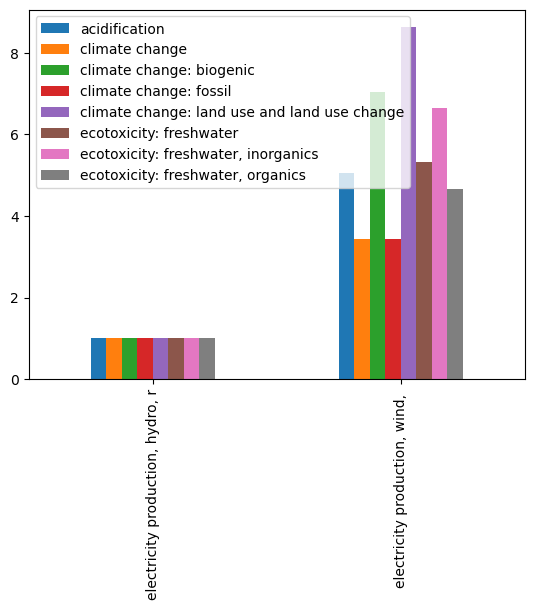

In [176]:
df.div(df.iloc[0], axis=1).plot(kind="bar")

## Uncertainty

Values of exchanges in datasets may come with uncertainty.
See [documentation](https://stats-arrays.readthedocs.io/en/latest/) of `stats_array`.

Let's find out how uncertainty is defined in ecoinvent:

In [180]:
act = eidb.random()
for e in act.technosphere():
    #pprint(e.as_dict())
    print(e["name"])
    print(e.uncertainty_type)
    print(e.uncertainty)
    break
    

computer, laptop
<class 'stats_arrays.distributions.lognormal.LognormalUncertainty'>
{'uncertainty type': 2, 'loc': -8.909199279840246, 'scale': 0.20303940504246953}


### Running a stochastic analysis (Monte Carlo)

In [181]:
iterations = 10
results = np.zeros((2, iterations))

In [182]:
results

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [183]:
EFV3[1]

('EF v3.1', 'climate change', 'global warming potential (GWP100)')

In [186]:
%%time

for a, activity in enumerate([hydro, wind]):
    lca = bw2calc.MonteCarloLCA(
        demand={activity: 1},
        method=EFV3[1],
        seed=42
    )
    #lca.lci()
    #lca.lcia()
    
    results[a] = [lca.score for _ in zip(range(iterations), lca)]


/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 1.11e+15)
  warnings.warn(msg, UmfpackWarning)


CPU times: user 3.2 s, sys: 359 ms, total: 3.56 s
Wall time: 3.12 s


In [187]:
results

array([[0.00767504, 0.00479403, 0.00520508, 0.00466754, 0.00447076,
        0.00316092, 0.00411702, 0.00698947, 0.00484242, 0.00466148],
       [0.01682629, 0.01242168, 0.01428306, 0.01683632, 0.01495363,
        0.01327942, 0.01491476, 0.01432409, 0.01436309, 0.01639968]])

In [188]:
%%time


lca = bw2calc.MonteCarloLCA(
    demand={hydro: 1, wind: -1},
    method=EFV3[1],
    #seed=42
)
#lca.lci()
#lca.lcia()

[lca.score for _ in zip(range(iterations), lca)]


/opt/homebrew/Caskroom/miniforge/base/envs/bw2/lib/python3.11/site-packages/scikits/umfpack/umfpack.py:736: UmfpackWarning: (almost) singular matrix! (estimated cond. number: 5.15e+13)
  warnings.warn(msg, UmfpackWarning)


CPU times: user 1.61 s, sys: 185 ms, total: 1.79 s
Wall time: 1.57 s


[-0.007552831276232029,
 -0.014536932208282064,
 -0.008515980106114514,
 -0.008599794199958852,
 -0.0104928206370137,
 -0.011555129406347148,
 -0.015589165229208739,
 -0.008742790605669244,
 -0.011994247607660317,
 -0.009152831242938635]

Let's visualize the results:

In [189]:
df = pd.DataFrame(results.T, columns=["Hydro", "Wind"])
df

,Hydro,Wind
0,0.007675,0.016826
1,0.004794,0.012422
2,0.005205,0.014283
3,0.004668,0.016836
4,0.004471,0.014954
5,0.003161,0.013279
6,0.004117,0.014915
7,0.006989,0.014324
8,0.004842,0.014363
9,0.004661,0.016400


<Axes: >

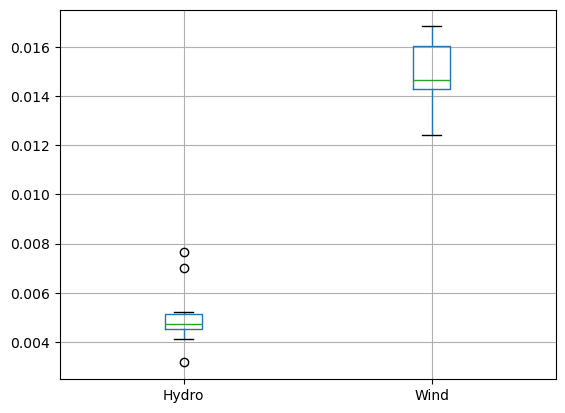

In [190]:
df.boxplot()

That's it for the time being.

Additional resources to dig the topic deeper:
* Exercises on [bw2calc and bw_processing](https://github.com/Depart-de-Sentier/Spring-School-2024/blob/main/class-materials/brightway-basics/2%20-%20Building%20and%20using%20matrices%20in%20bw2calc.ipynb)